In [1506]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [1507]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
whole_data = pd.concat([train,test], ignore_index = True)

In [1508]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1509]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1510]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1511]:
train.isnull().head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [1512]:
#Data analysis#

In [1513]:
train['Survived'].value_counts() #Proportion of survived and unsurvived

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

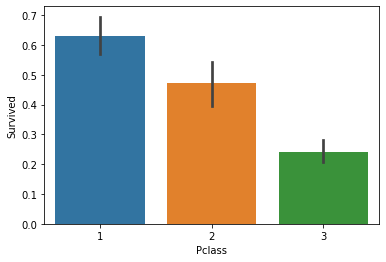

In [1514]:
sns.barplot(x="Pclass",y="Survived",data = whole_data)
# Effect of social class on survival: 
# The higher the social class, the higher the survival rate.

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

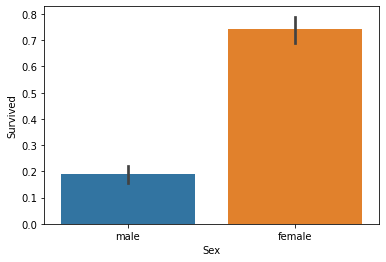

In [1515]:
sns.barplot(x="Sex",y="Survived",data = whole_data)
# Effect of gender on survival: 
# Women have a much higher survival rate than men

Text(28.088425925925918, 0.5, 'Survived')

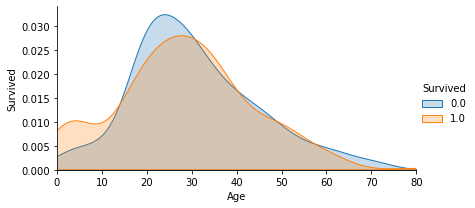

In [1516]:
f = sns.FacetGrid(whole_data, hue = "Survived", aspect = 2)
f.map(sns.kdeplot,'Age',shade = 'True')# Kernel density estimation, Non-parametric
f.set(xlim=(0,train['Age'].max())) #Set the value display range for the x-axis
f.add_legend()
plt.xlabel('Age')
plt.ylabel('Survived')
# Effect of age on survival: 
# Those in the 0-35 age group have a higher probability of survival, those above 35 years have a lower probability of survival

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

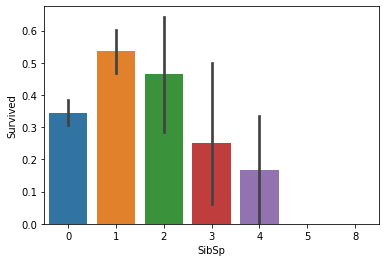

In [1517]:
# Effect of relatives on survival: 
# People with 2 to 4 family members have higher survival rates
# SibSp Feature：Higher survival rate for passengers with moderate number of spouses and siblings
sns.barplot(x="SibSp", y="Survived", data = whole_data)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

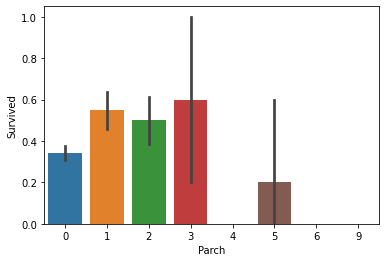

In [1518]:
#Parch Feature: Higher survival rate for passengers with moderate number of parents and children
sns.barplot(x="Parch",y="Survived", data = whole_data)

<AxesSubplot:xlabel='Family', ylabel='Survived'>

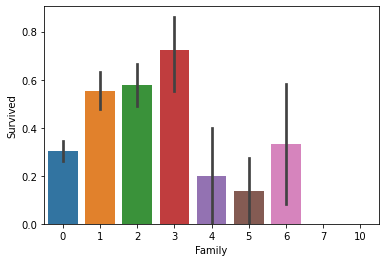

In [1519]:
# Combining the two characteristics of immediate and collateral kin into family size allows us to look more intuitively at the effect of this characteristic of kin on survival rates
whole_data['Family'] = whole_data['SibSp']+whole_data['Parch']
sns.barplot(x="Family",y="Survived", data=whole_data)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

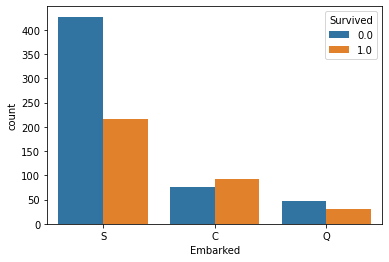

In [1520]:
# Impact of different ports of embarkation on survival: higher survival in C and Q, lower survival in S
sns.countplot('Embarked',hue='Survived',data=whole_data)

In [1521]:
print(train["Name"])

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object


In [1522]:
#Feature Engineering

<AxesSubplot:xlabel='Title', ylabel='Survived'>

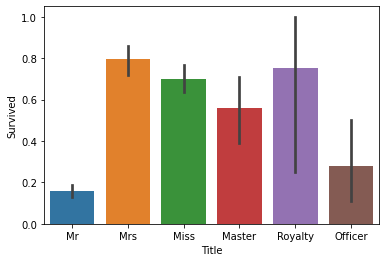

In [1523]:
# Name processing
#Title Feature(New)
whole_data['Title'] = whole_data['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
whole_data['Title'].replace(['Mr'], 'Mr', inplace=True)
whole_data['Title'].replace(['Mlle', 'Miss'], 'Miss', inplace=True)
whole_data['Title'].replace(['Mme', 'Ms', 'Mrs'],'Mrs', inplace=True)
whole_data['Title'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'],'Officer', inplace=True)
whole_data['Title'].replace(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty', inplace=True)
whole_data['Title'].replace(['Master','Jonkheer'],'Master', inplace=True)

sns.barplot(x="Title", y="Survived", data=whole_data)

# The survival rate of Mrs, Miss and Master, Royalty, who represent the upper echelons of society, is much higher than that of Mr, who represents men, and Officer, who represents the middle and lower echelons of society.

<AxesSubplot:xlabel='Family', ylabel='Survived'>

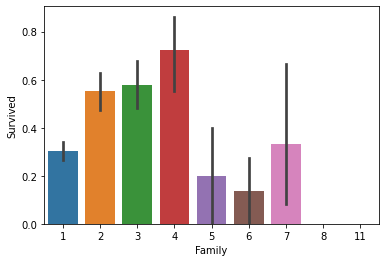

In [1524]:
#Treatment of family characteristics
whole_data['Family'] = whole_data['SibSp'] + whole_data['Parch'] + 1
sns.barplot(x="Family", y="Survived", data = whole_data)

<AxesSubplot:xlabel='Family_label', ylabel='Survived'>

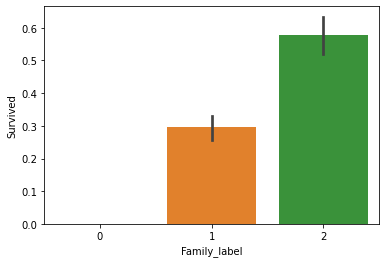

In [1525]:
#Classfication : Family label
def Family_label(z):
    if (z > 7):
        return 0
    elif (z >= 2) & (z <=4):
        return 2
    elif ((z > 4) & (z <= 7)) | (z == 1):
        return 1
whole_data['Family_label'] = whole_data['Family'].apply(Family_label)
sns.barplot(x="Family_label",y="Survived",data = whole_data)

#Family_type.2" with 2-4 family members has a higher survival rate

<AxesSubplot:xlabel='Deck', ylabel='Survived'>

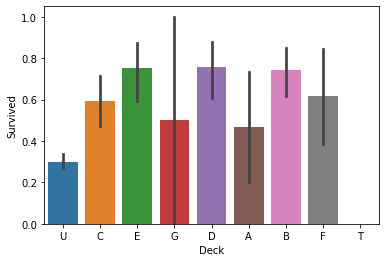

In [1526]:
# 'Cabin' data processing
whole_data['Cabin'] = whole_data['Cabin'].fillna("Unknown")
whole_data['Deck'] = whole_data['Cabin'].str.get(0)
sns.barplot(x="Deck", y="Survived", data = whole_data)

<AxesSubplot:xlabel='Ticket_Class', ylabel='Survived'>

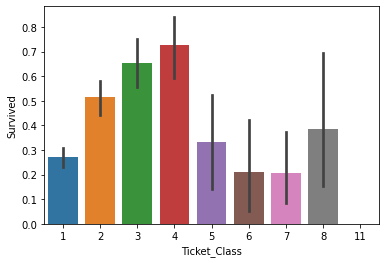

In [1527]:
# 'Ticket' processing
whole_data['Ticket'].value_counts()

Ticket_Count = dict(whole_data['Ticket'].value_counts())
whole_data['Ticket_Class'] = whole_data['Ticket'].apply(lambda x:Ticket_Count[x])
sns.barplot(x='Ticket_Class', y= 'Survived', data = whole_data)

<AxesSubplot:xlabel='Ticket_Class', ylabel='Survived'>

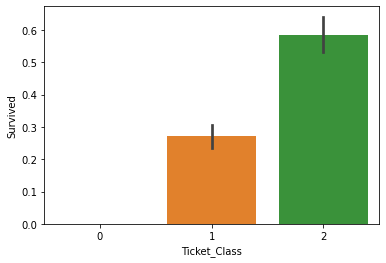

In [1528]:
# The survival rate of 'tickets' from 2 to 4 is higher than all others
def Ticket_Label(t):
        if (t > 8):
            return 0
        elif ((t > 4) & (t <= 8)) | (t == 1):
            return 1
        elif (t >= 2) & (t <= 4):
            return 2
    
whole_data['Ticket_Class'] = whole_data['Ticket_Class'].apply(Ticket_Label)
sns.barplot(x="Ticket_Class",y="Survived",data = whole_data)

In [1529]:
#Embarked number
whole_data[whole_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Title,Family_label,Deck,Ticket_Class
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1,Miss,1,B,2
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1,Mrs,1,B,2


In [1530]:
whole_data.groupby(by=["Pclass",'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [1531]:
whole_data['Embarked'] = whole_data['Embarked'].fillna('C')

In [1532]:
whole_data[whole_data['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Title,Family_label,Deck,Ticket_Class
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,Unknown,S,1,Mr,1,U,1


In [1533]:
fare=whole_data[(whole_data['Embarked'] == "S") & (whole_data['Pclass'] == 3)].Fare.median()
whole_data['Fare']=whole_data['Fare'].fillna(fare)

In [1534]:
agedf = whole_data[['Age', 'Pclass','Sex','Title']]
agedf = pd.get_dummies(agedf)
know_age = agedf[agedf.Age.notnull()].values
unknow_age = agedf[agedf.Age.isnull()].values
y = know_age[:, 0]
x = know_age[:, 1:]
random = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
random.fit(x, y)
predict_Ages = random.predict(unknow_age[:, 1::])
whole_data.loc[ (whole_data.Age.isnull()), 'Age' ] = predict_Ages 

In [1535]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1536]:
#Outlier handling
whole_data['Surname']=whole_data['Name'].apply(lambda x:x.split(',')[0].strip())
Surname_Count = dict(whole_data['Surname'].value_counts())
whole_data['FamilyGroup'] = whole_data['Surname'].apply(lambda x:Surname_Count[x])
Female_Child_Group=whole_data.loc[(whole_data['FamilyGroup']>=2) & ((whole_data['Age']<=12) | (whole_data['Sex']=='female'))]
Male_Adult_Group=whole_data.loc[(whole_data['FamilyGroup']>=2) & (whole_data['Age']>12) & (whole_data['Sex']=='male')]


Text(0.5, 0, 'AverageSurvived')

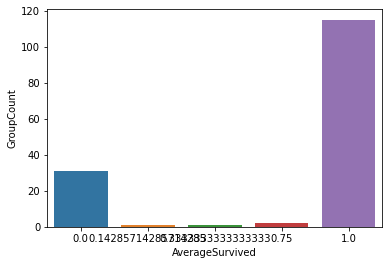

In [1537]:
Female_Child=pd.DataFrame(Female_Child_Group.groupby('Surname')['Survived'].mean().value_counts())
Female_Child.columns=['GroupCount']
sns.barplot(x=Female_Child.index, y=Female_Child["GroupCount"]).set_xlabel('AverageSurvived')


In [1538]:
Male_Adult=pd.DataFrame(Male_Adult_Group.groupby('Surname')['Survived'].mean().value_counts())
Male_Adult.columns=['GroupCount']
Male_Adult

,GroupCount
0.000000,122
1.000000,20
0.500000,6
0.333333,2
0.250000,1


In [1539]:
Female_Child_Group=Female_Child_Group.groupby('Surname')['Survived'].mean()
Dead_List=set(Female_Child_Group[Female_Child_Group.apply(lambda x:x==0)].index)
print(Dead_List)
Male_Adult_List=Male_Adult_Group.groupby('Surname')['Survived'].mean()
Survived_List=set(Male_Adult_List[Male_Adult_List.apply(lambda x:x==1)].index)
print(Survived_List)

{'Lobb', 'Caram', 'Sage', 'Cacic', 'Canavan', 'Van Impe', 'Danbom', 'Boulos', 'Strom', 'Lefebre', 'Oreskovic', 'Olsson', 'Johnston', 'Arnold-Franchi', 'Rosblom', 'Ford', 'Bourke', 'Lahtinen', 'Vander Planke', 'Robins', 'Barbara', 'Jussila', 'Attalah', 'Palsson', 'Skoog', 'Zabour', 'Ilmakangas', 'Rice', 'Panula', 'Goodwin', 'Turpin'}
{'Frauenthal', 'Greenfield', 'Dick', 'Harder', 'Bradley', 'Bishop', 'McCoy', 'Beckwith', 'Goldenberg', 'Cardeza', 'Duff Gordon', 'Daly', 'Frolicher-Stehli', 'Jonsson', 'Nakid', 'Kimball', 'Beane', 'Jussila', 'Taylor', 'Chambers'}


In [1540]:
train=whole_data.loc[whole_data['Survived'].notnull()]
test=whole_data.loc[whole_data['Survived'].isnull()]
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Sex'] = 'male'
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Age'] = 60
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Title'] = 'Mr'
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Sex'] = 'female'
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Age'] = 5
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Title'] = 'Miss'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [1541]:
# Feature conversion
whole_data=whole_data[['Survived','Pclass','Sex','Age','Fare','Embarked','Title','Family_label','Deck','Ticket_Class']]
whole_data=pd.get_dummies(whole_data)
train=whole_data[whole_data['Survived'].notnull()]
test=whole_data[whole_data['Survived'].isnull()].drop('Survived',axis=1)
X = train.values[:,1:]
y = train.values[:,0]

In [1542]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X, y)
Y_pred = decision_tree.predict(X)
acc_decision_tree = round(decision_tree.score(X, y) * 100, 2)
acc_decision_tree

98.77

In [1543]:
#SVC
from sklearn.svm import SVC, LinearSVC
svc = SVC()
svc.fit(X, y)
Y_pred = svc.predict(X)
acc_svc = round(svc.score(X, y) * 100, 2)
acc_svc

68.69

In [1544]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X, y)
Y_pred = knn.predict(X)
acc_knn = round(knn.score(X, y) * 100, 2)
acc_knn

84.51

In [1545]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X, y)
Y_pred = gaussian.predict(X)
acc_gaussian = round(gaussian.score(X, y) * 100, 2)
acc_gaussian


76.43

0.8047440699126092 1.01


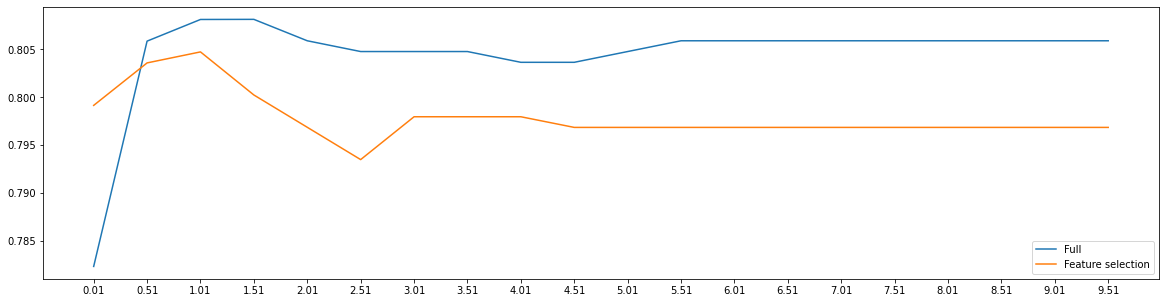

In [1546]:
fullx = []
fsx = []

C=np.arange(0.01,10.01,0.5)
for i in C:
    LR_ = LR(solver="liblinear",C=i,random_state=420)
    fullx.append(cross_val_score(LR_,X,y,cv=10).mean())
    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(X,y)
    fsx.append(cross_val_score(LR_,X_embedded,y,cv=10).mean())
    
print(max(fsx),C[fsx.index(max(fsx))])
plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="Full")
plt.plot(C,fsx,label="Feature selection")
plt.xticks(C)
plt.legend()
plt.show()


0.8058676654182271 0.9850000000000004


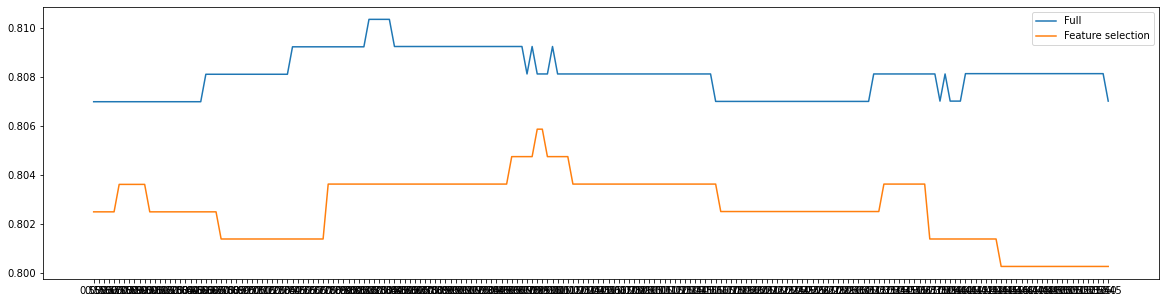

In [1547]:
fullx = []
fsx = []
C=np.arange(0.55,1.55,0.005)
for i in C:
    LR_ = LR(solver="liblinear",C=i,random_state=420)
    fullx.append(cross_val_score(LR_,X,y,cv=10).mean())
    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(X,y)
    fsx.append(cross_val_score(LR_,X_embedded,y,cv=10).mean())
    
print(max(fsx),C[fsx.index(max(fsx))])
plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="Full")
plt.plot(C,fsx,label="Feature selection")
plt.xticks(C)
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


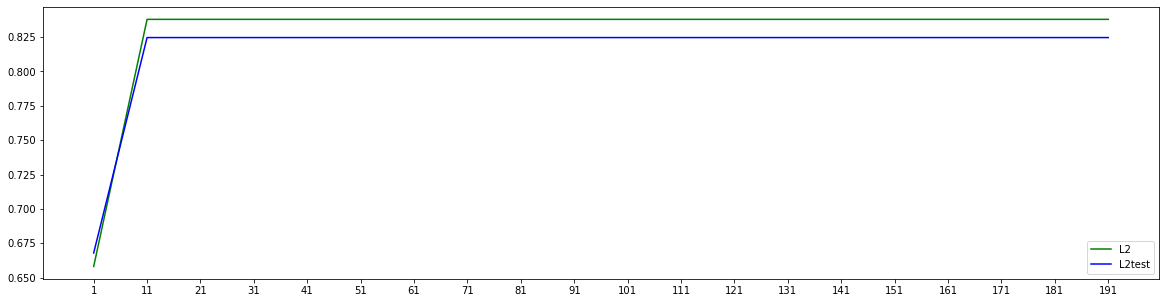

In [1548]:

lr2 = []
lr2test = []
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
for i in np.arange(1,201,10):
    lrl2 = LR(penalty="l2",solver="liblinear",C=0.9850000000000004,max_iter=i)
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    lr2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    lr2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))
    
graph = [lr2,lr2test]
color = ["green","blue"]
label = ["L2","L2test"]

plt.figure(figsize=(20,5))
for i in range(len(graph)):
    plt.plot(np.arange(1,201,10),graph[i],color[i],label=label[i])
plt.legend(loc=4)
plt.xticks(np.arange(1,201,10))
plt.show()


In [1549]:
lr = LR(penalty="l2",solver="liblinear",C=0.9850000000000004,max_iter=300).fit(X,y)
cross_val_score(lr,X,y,cv=10).mean()

0.8081273408239701

In [1550]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest

select = SelectKBest(k = 20)
clf = RandomForestClassifier(random_state = 10, warm_start = True, 
                                  n_estimators = 26,
                                  max_depth = 6, 
                                  max_features = 'sqrt')
pipeline = make_pipeline(select, clf)
pipeline.fit(X, y)

Pipeline(steps=[('selectkbest', SelectKBest(k=20)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=6, max_features='sqrt',
                                        n_estimators=26, random_state=10,
                                        warm_start=True))])

In [1551]:
predictions = lr.predict(test)
test=pd.read_csv('test.csv')
PassengerId=test['PassengerId']
prdict_test = pd.DataFrame({"PassengerId": PassengerId, "Survived": predictions.astype(np.int32)})
prdict_test.to_csv("predict_test.csv", index=False)